alejandra jaramillo
1/10/2025

Calculating TEWL averages

naming:
Study: subject id_scan id

Leenas: Leena_arm_location_scan id

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import glob


def collect_subject_id_from_file(file_in: str) -> str:
    """
    Determine the subject id from the input TEWL file name which has the format:

    """

    subject_id = file_in.split("/")[-1].split(".")[0].split("_")[0]
    return subject_id


def collect_return_visit_from_file(file_in: str) -> bool:
    """
    Determine from the input TEWL file name if is a return visit. Input file format:

        data/{subject_id}_{return visit = R}_{scan_id}.xls
    """
    return "_R_" in file_in.split("/")[-1].split(".")[0]


def collect_scan_id_from_file(file_in: str) -> int:
    """
    Determine the scan id from the input TEWL file name which has the format:

        data/{subject_id}_{return visit = R}_{scan_id}.xls
    """
    scan_id = int(file_in.split("/")[-1].split(".")[0].split("_")[-1])
    
    return scan_id

def collect_arm_id_from_file(file_in: str) -> int:
    """
    
    """
    arm_id = file_in.split("/")[-1].split(".")[0].split("_")[-3]
    
    return arm_id

def collect_location_id_from_file(file_in: str) -> int:
    """
    
    """
    location_id = int(file_in.split("/")[-1].split(".")[0].split("_")[-2])
    
    return location_id

def collect_pre_post_from_file(file_in: str) -> int:
    """
    
    """
    name_check= file_in.split("/")[-1].split(".")[0].split("_")[-4]
    if name_check == "Leena":
        post_exposure = True
    else:
        post_exposure = False
    
    return post_exposure

class Scan:
    def __init__(self, scan_id, return_visit, data, arm = None, location = None, post_exposure = None):
        self.scan_id = scan_id
        self.return_visit = return_visit
        self.data = data
        self.arm = arm
        self.location = location
        self.post_exposure = post_exposure


class Subject:
    def __init__(self, subject_id):
        self.subject_id = subject_id
        self.scans = None
        self.num_scans = 0

    def add_scan(self, scan_id, return_visit, data, arm = None, location = None, post_exposure = None):
        """_summary_

        Args:
            visit_id (_type_): _description_
            return_visit (_type_): _description_
            data (_type_): _description_
        """
        if self.scans is None:
            self.scans = []

        self.scans.append(Scan(scan_id=scan_id, return_visit=return_visit, data=data, arm=arm, location=location, post_exposure=post_exposure))
        self.num_scans += 1

    def plot_tewl_data(self):
        """
        Plot the TEWL data
        """
        colors = ["#1f77b4", "#2ca02c", "#ff7f0e"]
        fig, ax = plt.subplots()
        for scan in self.scans:
            if scan.return_visit:
                plt.plot(
                    scan.data["TM_TEWL"],
                    linestyle="dotted",
                    label=scan.scan_id,
                    c=colors[scan.scan_id - 1],
                )
            else:
                if self.subject_id == "Leena":
                    continue
                print(self.subject_id,scan.scan_id - 1)
                plt.plot(
                    scan.data["TM_TEWL"],
                    label=scan.scan_id,
                    c=colors[scan.scan_id - 1],
                )
        plt.xticks(visible=True)
        plt.title(self.subject_id)
        plt.ylim(4,15)
        plt.xlim(10,40)
        plt.xlabel("Time (seconds)")
        plt.ylabel("TEWL (g/m2/h)")
        plt.savefig(f"../data_out/tewl_{self.subject_id}.pdf")
        plt.close()

In [9]:
### Get a list of all files
files_tewl_raw = glob.glob("data/TEWL_Data/*.xls")
print(files_tewl_raw)

### Control the output
logging = True

### Initialize the data
subject_data = {}
subject_ids = []

### Iterate through all of the data
for file in files_tewl_raw:
    subject_id = collect_subject_id_from_file(file)
    scan_id = collect_scan_id_from_file(file)
    return_visit = collect_return_visit_from_file(file)
    if subject_id == "Leena":
        arm = collect_arm_id_from_file(file)
        location = collect_location_id_from_file(file)
        post_exposure = collect_pre_post_from_file(file)
    else:
        arm = None
        location = None
        post_exposure = None
        
    
    #print(file, subject_id, scan_id, return_visit)
    try:
        data = pd.read_excel(file)
    except Exception as reason:
        data = None
        if logging:
            print(
                f"There is an issue with \t {file}. \t This data will be excluded from the analysis. Reason: {reason}"
            )

        continue
    if subject_id not in subject_data:
        subject_data[subject_id] = Subject(subject_id=subject_id)

    subject_data[subject_id].add_scan(
        scan_id=scan_id,
        return_visit=return_visit,
        data=data, arm=arm, location=location, post_exposure=post_exposure
    )
for subject_id, subject in subject_data.items():
    subject.plot_tewl_data()

['data/TEWL_Data/L81_02.xls', 'data/TEWL_Data/D47_01.xls', 'data/TEWL_Data/A52_R_02.xls', 'data/TEWL_Data/P38_03.xls', 'data/TEWL_Data/A52_02.xls', 'data/TEWL_Data/A52_03.xls', 'data/TEWL_Data/P38_02.xls', 'data/TEWL_Data/A52_R_03.xls', 'data/TEWL_Data/L81_03.xls', 'data/TEWL_Data/L81_01.xls', 'data/TEWL_Data/D47_02.xls', 'data/TEWL_Data/A52_R_01.xls', 'data/TEWL_Data/A52_01.xls', 'data/TEWL_Data/P38_01.xls', 'data/TEWL_Data/D47_03.xls', 'data/TEWL_Data/Leena_leftarm_02_09.xls', 'data/TEWL_Data/L71_R_03.xls', 'data/TEWL_Data/U34_R_03.xls', 'data/TEWL_Data/C14_02.xls', 'data/TEWL_Data/C14_03.xls', 'data/TEWL_Data/U34_R_02.xls', 'data/TEWL_Data/L71_R_02.xls', 'data/TEWL_Data/Leena_leftarm_02_08.xls', 'data/TEWL_Data/C14_01.xls', 'data/TEWL_Data/U34_R_01.xls', 'data/TEWL_Data/L71_R_01.xls', 'data/TEWL_Data/R98_R_01.xls', 'data/TEWL_Data/R98_R_03.xls', 'data/TEWL_Data/R98_R_02.xls', 'data/TEWL_Data/Leena_rightarm_02_04.xls', 'data/TEWL_Data/B05_R_03.xls', 'data/TEWL_Data/R09_01.xls', 'data

average TEWL for each scan and subject
n value skips the first n scan measurements 

In [10]:
n = 10
for subject_id, subject in subject_data.items():
    for scan in subject.scans:
        average = np.mean(scan.data["TM_TEWL"][n:])
        print(subject_id, scan.scan_id,scan.return_visit, scan.arm, average)

L81 2 False None 8.885714285714286
L81 3 False None 8.099999999999998
L81 1 False None 9.905714285714287
L81 1 True None 9.514285714285714
L81 2 True None 7.631428571428572
L81 3 True None 7.194285714285715
D47 1 False None 10.705714285714285
D47 2 False None 9.494285714285715
D47 3 False None 9.605714285714285
A52 2 True None 9.34
A52 2 False None 6.857142857142857
A52 3 False None 7.4
A52 3 True None 8.694285714285714
A52 1 True None 9.400000000000002
A52 1 False None 8.637142857142857
P38 3 False None 8.082857142857142
P38 2 False None 9.442857142857143
P38 1 False None 10.922857142857143
Leena 9 False leftarm 10.728571428571428
Leena 8 False leftarm 10.805714285714286
Leena 4 False rightarm 9.451428571428572
Leena 3 False rightarm 10.997142857142858
Leena 2 False rightarm 10.071428571428571
Leena 1 False rightarm 10.302857142857142
Leena 6 False leftarm 11.368571428571428
Leena 7 False leftarm 10.700000000000001
Leena 4 False leftarm 10.442857142857141
Leena 10 False leftarm 10.182

standard deviation 

In [11]:
n = 10
for subject_id, subject in subject_data.items():
    for scan in subject.scans:
        std_dev = np.std(scan.data["TM_TEWL"][n:])
        print(subject_id, scan.scan_id,scan.return_visit, std_dev)

L81 2 False 0.2531435020952767
L81 3 False 0.2848558532711891
L81 1 False 0.4035151667483122
L81 1 True 0.34652796806760233
L81 2 True 0.2815989332076267
L81 3 True 0.20694078813979228
D47 1 False 0.4497255398845944
D47 2 False 0.4013853560876789
D47 3 False 0.2817728133928945
A52 2 True 0.23928464818525852
A52 2 False 0.21815553335795515
A52 3 False 0.20424075429327454
A52 3 True 0.2495056336528091
A52 1 True 0.2354327322794591
A52 1 False 0.5717570484471352
P38 3 False 0.42324306713465604
P38 2 False 0.32007652146297255
P38 1 False 0.525947153394013
Leena 9 False 0.298157607958733
Leena 8 False 0.3488289446893151
Leena 4 False 0.9978180276616228
Leena 3 False 0.2999863942492957
Leena 2 False 0.4861342722049587
Leena 1 False 0.28733824198342
Leena 6 False 0.2252255105716154
Leena 7 False 0.6405354902624165
Leena 4 False 0.3441641753463553
Leena 10 False 0.3737728219774408
Leena 1 False 0.18101753213093896
Leena 2 False 0.3486885049286651
Leena 3 False 0.3918975292973763
Leena 1 False 

median values

In [14]:
n = 10
average_tewl = {}
for subject_id, subject in subject_data.items():
    average_tewl[subject_id] = {"initial":0, "initial_count":0, "return": 0, "return_count":0}
    for scan in subject.scans:
        if scan.return_visit:
            average_tewl[subject_id]["return"] += np.sum(scan.data["TM_TEWL"][n:])
            average_tewl[subject_id]["return_count"] += scan.data["TM_TEWL"][n:].shape[0]
        else:
            average_tewl[subject_id]["initial"] += np.sum(scan.data["TM_TEWL"][n:])
            average_tewl[subject_id]["initial_count"] += scan.data["TM_TEWL"][n:].shape[0]

for id in average_tewl.keys():
    if average_tewl[id]["initial_count"] > 0:
        average_tewl[id]["initial"] = average_tewl[id]["initial"] / average_tewl[id]["initial_count"]
    if average_tewl[id]["return_count"] > 0:
        average_tewl[id]["return"] = average_tewl[id]["return"] / average_tewl[id]["return_count"]

    print(id,average_tewl[id]["initial"],average_tewl[id]["return"])            

L81 8.963809523809525 8.113333333333335
D47 9.935238095238097 0
A52 7.631428571428571 9.144761904761905
P38 9.482857142857144 0
Leena 10.351428571428574 0
L71 9.965714285714286 8.608571428571427
U34 9.106666666666667 10.772380952380951
C14 8.637142857142859 0
R98 7.414285714285715 9.481904761904762
B05 11.856190476190477 8.755238095238095
R09 7.267619047619049 0
G07 7.994285714285714 7.8238095238095235
Z65 6.9504761904761905 0
W40 6.9399999999999995 0
T98 12.188571428571429 0
E11 8.436190476190477 0
F12 7.496190476190475 0
M16 6.977142857142856 8.108571428571427
N64 8.046666666666667 0
S88 10.64857142857143 0
R22 12.527619047619048 0
E50 14.124761904761906 0
Y20 8.511428571428572 0


median value for human study

In [147]:
import numpy as np

n = 10
all_scan_data = []  # List to store all scan data for median calculation

# Loop through all subjects and scans
for subject_id, subject in subject_data.items():
    # Skip subjects with "Leena" in the subject ID
    if "Leena" in subject_id:
        continue
    
    for scan in subject.scans:
        # Append the relevant scan data to the list
        all_scan_data.extend(scan.data["TM_TEWL"][n:])

# Calculate the median of all scan data for all subjects excluding "Leena"
med_all_subjects = np.median(all_scan_data)

print("Median value for all subjects excluding 'Leena':", med_all_subjects)

Median value for all subjects excluding 'Leena': 8.7


mean, median and std of human study median values

In [148]:
import numpy as np
import scipy.stats as stats

# List of values
values = [
    8.8, 8.1, 10.1, 9.5, 7.7, 7.2, 10.8, 9.5, 9.6, 9.3, 6.8, 7.4, 8.7, 9.3, 8.8, 
    8.1, 9.5, 11.1, 8.4, 8.0, 9.4, 11.0, 9.0, 9.8, 8.7, 9.8, 13.8, 9.7, 9.3, 8.4, 
    8.2, 7.7, 10.0, 10.2, 8.5, 9.8, 8.3, 6.6, 7.4, 7.5, 8.9, 9.9, 12.5, 11.6, 11.6, 
    9.3, 6.5, 6.0, 6.8, 8.6, 8.6, 7.4, 7.5, 8.8, 7.5, 6.0, 7.2, 32.6, 8.7, 15.6, 
    8.0, 6.0, 7.0, 8.2, 8.9, 8.3, 7.5, 7.1, 7.9, 7.9, 8.4, 7.6, 8.9, 6.5, 6.0, 7.8, 
    7.7, 8.7, 9.6, 9.7, 12.7, 12.6, 13.3, 12.2, 16.9, 11.7, 13.8, 9.7, 8.4, 7.4
]

# Mean
mean_value = np.mean(values)

# Standard Deviation
std_dev = np.std(values)

# Median
median_value = np.median(values)

# Quartiles
q1, q3 = np.percentile(values, [25, 75])

print(f"Mean: {mean_value}")
print(f"Standard Deviation: {std_dev}")
print(f"Median: {median_value}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")

Mean: 9.30888888888889
Standard Deviation: 3.2092105101980195
Median: 8.7
Q1 (25th percentile): 7.7
Q3 (75th percentile): 9.775


return participants:
subject id: mean initial, mean returnm tstat, p_value

Subject ID L81: 8.963809523809525 8.113333333333332 6.5693089008974725 3.979891000786447e-10
8.3 9.5
7.2 9.3
Subject ID A52: 7.631428571428571 9.144761904761904 -16.70060675045608 2.79092167738115e-40
7.0 8.2
8.8 9.4
Subject ID L71: 9.965714285714284 8.60857142857143 12.740991742807795 7.309032897191709e-28
9.2 10.9
8.1 9.2
Subject ID U34: 9.106666666666667 10.772380952380953 -7.281625190109476 6.681657390132907e-12
8.6 9.6
8.8 13.5
Subject ID R98: 7.414285714285715 9.481904761904762 -19.551541071871718 5.314677756095782e-49
6.8 8.1
8.7 10.1
Subject ID B05: 11.856190476190475 8.755238095238095 25.962901262299166 3.518066854031613e-67
11.3 12.3
7.7 9.6


Subject ID G07: 7.994285714285713 7.8238095238095235 1.416591092912888 0.1580984300946947
6.9 8.7
7.3 8.7
Subject ID M16: 6.977142857142859 8.10857142857143 -9.259938909342608 2.5960592187382237e-17
6.1 8.2
7.6 8.6


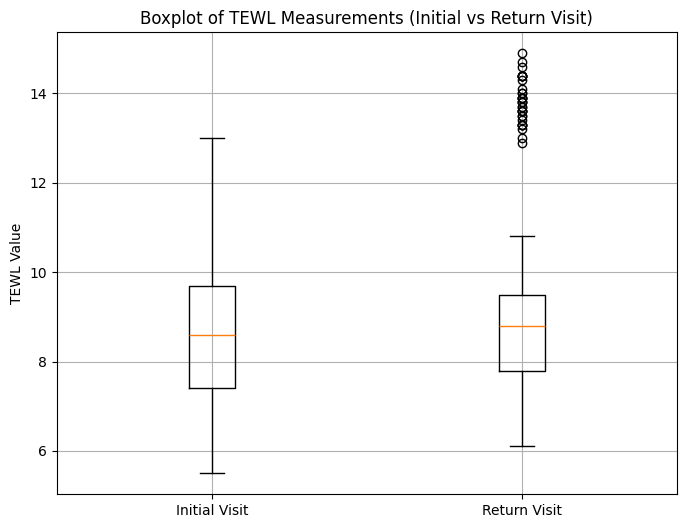

In [149]:
from scipy import stats
import matplotlib.pyplot as plt

n = 10
tewl_initial_all = []
tewl_return_all = []

for subject_id, subject in subject_data.items():
    subject_id_tewl_return = []
    subject_id_tewl_initial = []
    for scan in subject.scans:
        if scan.return_visit:
            subject_id_tewl_return.extend(scan.data["TM_TEWL"][n:])
        else:
            subject_id_tewl_initial.extend(scan.data["TM_TEWL"][n:])

    if subject_id_tewl_return:
        t_stat, p_value = stats.ttest_ind(subject_id_tewl_initial, subject_id_tewl_return)
        mean_return = np.mean(subject_id_tewl_return)
        mean_initial = np.mean(subject_id_tewl_initial)
        q1_intital, q3_initial = np.percentile(subject_id_tewl_initial, [25, 75])
        q1_return, q3_return = np.percentile(subject_id_tewl_return, [25, 75])
        print(f"Subject ID {subject_id}: {mean_initial} {mean_return} {t_stat} {p_value}")
        print(q1_intital, q3_initial)
        print(q1_return, q3_return)

        tewl_initial_all.extend(subject_id_tewl_initial)
        tewl_return_all.extend(subject_id_tewl_return)

plt.figure(figsize=(8, 6))
plt.boxplot([tewl_initial_all, tewl_return_all], labels=["Initial Visit", "Return Visit"])
plt.ylabel("TEWL Value")
plt.title("Boxplot of TEWL Measurements (Initial vs Return Visit)")
plt.grid(True)

# Show plot
plt.show()

box and whisker plot

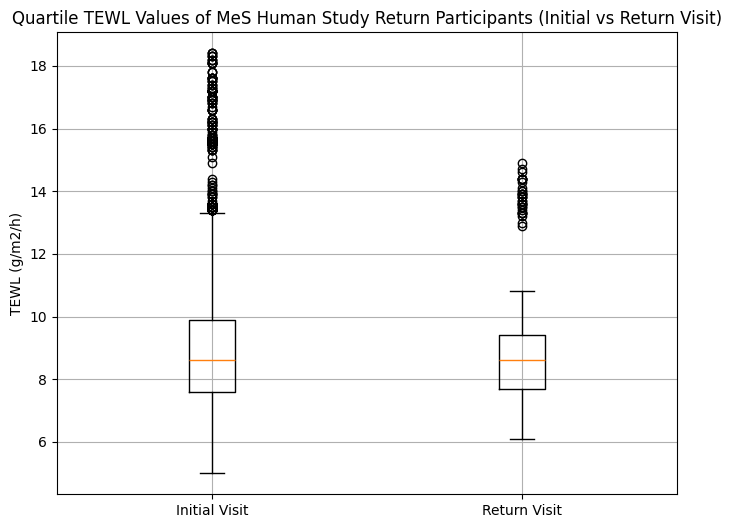

In [150]:
from scipy import stats

import matplotlib.pyplot as plt

 

n = 10

tewl_initial_all = []

tewl_return_all = []

 

for subject_id, subject in subject_data.items():
    if "Leena" in subject_id:  # Exclude subjects with "Leena" in their ID
        continue
    
    subject_id_tewl_return = []

    subject_id_tewl_initial = []

    for scan in subject.scans:

        if scan.return_visit:

            subject_id_tewl_return.extend(scan.data["TM_TEWL"][n:])
            tewl_return_all.extend(subject_id_tewl_return)

        else:

            subject_id_tewl_initial.extend(scan.data["TM_TEWL"][n:])
            tewl_initial_all.extend(subject_id_tewl_initial)

 
    if subject_id_tewl_return:

        #t_stat, p_value = stats.ttest_ind(subject_id_tewl_initial, subject_id_tewl_return)

        #mean_return = np.mean(subject_id_tewl_return)

        #mean_initial = np.mean(subject_id_tewl_initial)

        q1_intital, q3_initial = np.percentile(subject_id_tewl_initial, [25, 75])

        q1_return, q3_return = np.percentile(subject_id_tewl_return, [25, 75])

        #print(f"Subject ID {subject_id}: {mean_initial} {mean_return} {t_stat} {p_value}")

       # print(q1_intital, q3_initial)

       # print(q1_return, q3_return)

plt.figure(figsize=(8, 6))

plt.boxplot([tewl_initial_all, tewl_return_all],labels=["Initial Visit", "Return Visit"])

plt.ylabel("TEWL (g/m2/h)")

plt.title("Quartile TEWL Values of MeS Human Study Return Participants (Initial vs Return Visit)")

plt.grid(True)
plt.savefig("../data_out/tewl_return_initial_boxplot.pdf")

standard dev. for returns and initial

In [151]:
from scipy import stats
n = 10
for subject_id, subject in subject_data.items():
    subject_id_tewl_return = []
    subject_id_tewl_initial = []
    for scan in subject.scans:
        if scan.return_visit:
            subject_id_tewl_return.extend(scan.data["TM_TEWL"][n:])
        else:
            subject_id_tewl_initial.extend(scan.data["TM_TEWL"][n:])

    if subject_id_tewl_return:
        t_stat, p_value = stats.ttest_ind(subject_id_tewl_initial, subject_id_tewl_return, equal_var=False)
        std_return = np.std(subject_id_tewl_return)
        std_initial = np.std(subject_id_tewl_initial)
        print(f"Subject ID {subject_id}: {std_initial} {std_return} {t_stat} {p_value}")

Subject ID L81: 0.8057086569655914 1.045905091448292 6.5693089008974725 4.4772784460274737e-10
Subject ID A52: 0.8328167106088756 0.40047137758276635 -16.70060675045608 5.185961684094961e-36
Subject ID L71: 0.8490699193182835 0.6775465945269757 12.740991742807797 1.4859152048384753e-27
Subject ID U34: 0.6022602928281595 2.2537796925374787 -7.281625190109476 3.907755588191886e-11
Subject ID R98: 0.7649996665332072 0.7601730319793992 -19.551541071871718 5.323508799450451e-49
Subject ID B05: 0.6479158983524549 1.0314096643388648 25.962901262299162 6.4403519732514375e-62
Subject ID G07: 0.926522281121704 0.8048098041535516 1.416591092912888 0.15812767772557032
Subject ID M16: 1.098939501160498 0.5873450005404524 -9.259938909342608 1.3575601589344684e-16


leena data pre vs post p value tstat

In [152]:
from scipy import stats
n = 10
arms = ["rightarm", "leftarm"]
for subject_id, subject in subject_data.items():
    if subject_id == "Leena":
        for arm in arms:
            subject_id_tewl_post_exposure = []
            subject_id_tewl_pre_exposure = []
            for scan in subject.scans:
                if scan.arm == arm and scan.post_exposure == True:
                    subject_id_tewl_post_exposure.extend(scan.data["TM_TEWL"][n:])
            
                elif scan.arm == arm and scan.post_exposure == False:
                    subject_id_tewl_pre_exposure.extend(scan.data["TM_TEWL"][n:])

            if subject_id_tewl_post_exposure:
                t_stat, p_value = stats.ttest_ind(subject_id_tewl_pre_exposure, subject_id_tewl_post_exposure)
                mean_post = np.mean(subject_id_tewl_post_exposure)
                mean_pre = np.mean(subject_id_tewl_pre_exposure)
                print(f"Subject ID {subject_id} {arm}: {mean_pre} {mean_post} {t_stat} {p_value}")

Subject ID Leena rightarm: 11.265714285714287 9.996571428571428 8.553671632022853 2.6036850659180034e-15
Subject ID Leena leftarm: 9.93142857142857 10.493650793650794 -5.546274015535091 5.783171821115569e-08


std leena pre vs post

In [153]:
from scipy import stats
n = 10
arms = ["rightarm", "leftarm"]
for subject_id, subject in subject_data.items():
    if subject_id == "Leena":
        for arm in arms:
            subject_id_tewl_post_exposure_std = []
            subject_id_tewl_pre_exposure_std = []
            for scan in subject.scans:
                if scan.arm == arm and scan.post_exposure == True:
                    subject_id_tewl_post_exposure_std.extend(scan.data["TM_TEWL"][n:])
            
                elif scan.arm == arm and scan.post_exposure == False:
                    subject_id_tewl_pre_exposure_std.extend(scan.data["TM_TEWL"][n:])

            if subject_id_tewl_post_exposure_std:
                t_stat, p_value = stats.ttest_ind(subject_id_tewl_pre_exposure_std, subject_id_tewl_post_exposure_std)
                std_post = np.std(subject_id_tewl_post_exposure_std)
                std_pre = np.std(subject_id_tewl_pre_exposure_std)
                print(f"Subject ID {subject_id} {arm}: {std_pre} {std_post} {t_stat} {p_value}")

Subject ID Leena rightarm: 0.48399696406536463 0.8463634574110678 8.553671632022853 2.6036850659180034e-15
Subject ID Leena leftarm: 0.3486885049286651 0.5865890143070525 -5.546274015535091 5.783171821115569e-08


In [154]:
# from scipy import stats
# import numpy as np

# n = 10
# #arms = ["rightarm", "leftarm"]
# #for subject_id, subject in subject_data.items():
#     if subject_id == "Leena":
#         for arm in arms:
#             pre_exposure_values = []
#             post_exposure_values = []
            
#             for scan in subject.scans:
#                 # Match pre- and post-exposure data for paired t-test
#                 if scan.arm == arm:
#                     if scan.post_exposure:
#                         post_exposure_values.extend(scan.data["TM_TEWL"][n:])
#                     else:
#                         pre_exposure_values.extend(scan.data["TM_TEWL"][n:])

#             # Ensure equal lengths for pre- and post-exposure values (pairing requirement)
#             if pre_exposure_values and post_exposure_values:
#                 min_len = min(len(pre_exposure_values), len(post_exposure_values))
#                 paired_pre = pre_exposure_values[:min_len]
#                 paired_post = post_exposure_values[:min_len]

#                 # Perform paired t-test
#                 t_stat, p_value = stats.ttest_rel(paired_pre, paired_post)
#                 std_pre = np.std(paired_pre, ddof=1)  # ddof=1 for sample standard deviation
#                 std_post = np.std(paired_post, ddof=1)

#                 print(f"Subject ID {subject_id} {arm}:")
#                 print(f"Std Pre: {std_pre}, Std Post: {std_post}")
#                 print(f"T-statistic: {t_stat}, P-value: {p_value}")

median values for human study

In [155]:
from scipy import stats
n = 10
for subject_id, subject in subject_data.items():
    subject_id_tewl_return_ttest = []
    subject_id_tewl_initial_ttest = []
    for scan in subject.scans:
        if scan.return_visit:
            subject_id_tewl_return_ttest.extend(scan.data["TM_TEWL"][n:])
        else:
            subject_id_tewl_initial_ttest.extend(scan.data["TM_TEWL"][n:])

if len(subject_id_tewl_initial_ttest) == len(subject_id_tewl_return_ttest) and len(subject_id_tewl_initial_ttest) > 1:
        t_stat, p_value = stats.ttest_rel(subject_id_tewl_initial_ttest, subject_id_tewl_return_ttest)  # Paired t-test
        
        print(f"Subject ID {subject_id}: t = {t_stat}, p = {p_value}")
else:
     print(f"Skipping Subject {subject_id}: Unequal or insufficient data points")

Skipping Subject Y20: Unequal or insufficient data points


leena box plot

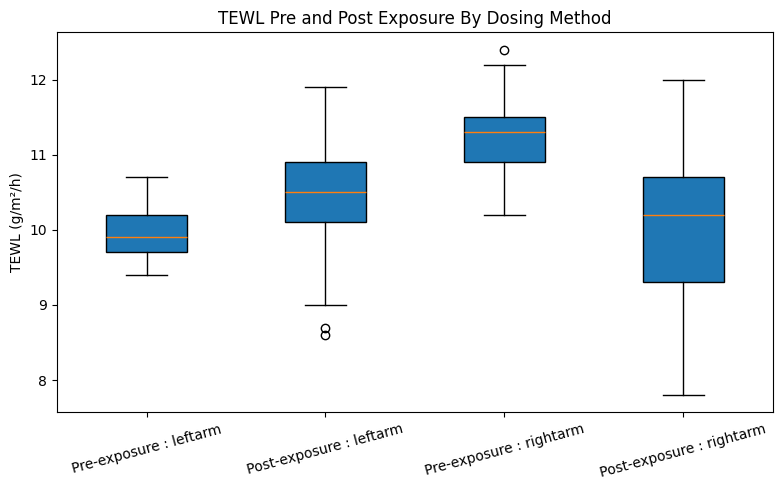

In [156]:
def plot_tewl_boxplot(subject_data):
    """
    Create a box-and-whisker plot for TEWL data before and after exposure for Leena.
    """
    leena_data = subject_data.get("Leena")
    if not leena_data:
        print("No data available for Leena.")
        return
    
    before_exposure = {}
    after_exposure = {}

    n=10
    # Organize TEWL data by arm and pre/post exposure
    for scan in leena_data.scans:
        if scan.data is not None:
            tewl_values = scan.data["TM_TEWL"][n:].dropna().tolist()  # Extract TEWL values
            
            if scan.arm not in before_exposure:
                before_exposure[scan.arm] = []
                after_exposure[scan.arm] = []
            
            if scan.post_exposure:
                after_exposure[scan.arm].extend(tewl_values)
            else:
                before_exposure[scan.arm].extend(tewl_values)

    # Create boxplot
    fig, ax = plt.subplots(figsize=(8, 5))
    labels = []
    all_data = []

    for arm in sorted(before_exposure.keys()):
        all_data.append(before_exposure[arm])
        labels.append(f"Pre-exposure : {arm}")
        
        all_data.append(after_exposure[arm])
        labels.append(f"Post-exposure : {arm}")

    ax.boxplot(all_data, patch_artist=True)
    ax.set_xticklabels(labels, rotation=15)
    ax.set_title("TEWL Pre and Post Exposure By Dosing Method")
    ax.set_ylabel("TEWL (g/m²/h)")

    plt.tight_layout()
    plt.savefig("../data_out/tewl_leena_boxplot.pdf")
    plt.show()


# Call the function to plot the data
plot_tewl_boxplot(subject_data)

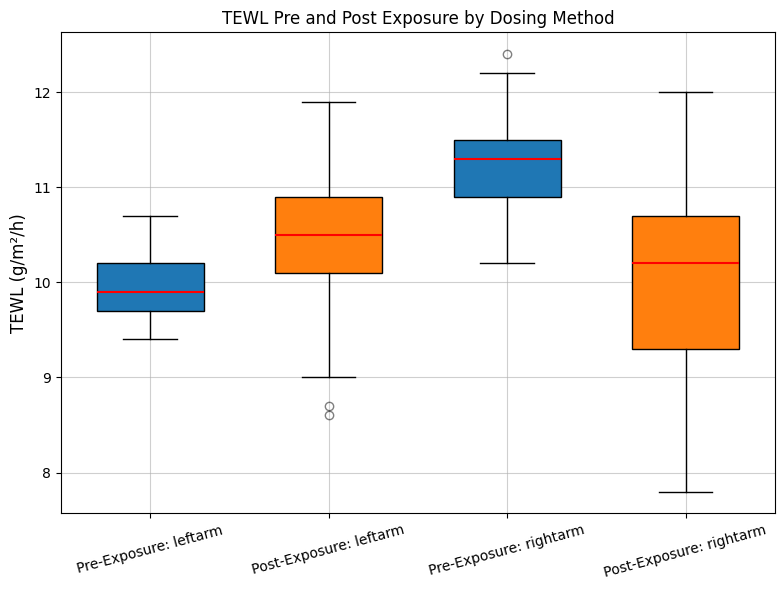

In [157]:
import matplotlib.pyplot as plt

def plot_tewl_boxplot(subject_data):
    """
    Create a box-and-whisker plot for TEWL data before and after exposure for Leena,
    formatted to match the general study's TEWL plot style.
    """
    leena_data = subject_data.get("Leena")
    if not leena_data:
        print("No data available for Leena.")
        return
    
    before_exposure = {}
    after_exposure = {}

    n = 10  # Number of initial values to ignore

    # Organize TEWL data by arm and pre/post exposure
    for scan in leena_data.scans:
        if scan.data is not None and "TM_TEWL" in scan.data:
            tewl_values = scan.data["TM_TEWL"][n:].dropna().tolist()  # Extract TEWL values

            if scan.arm not in before_exposure:
                before_exposure[scan.arm] = []
                after_exposure[scan.arm] = []
            
            if scan.post_exposure:
                after_exposure[scan.arm].extend(tewl_values)
            else:
                before_exposure[scan.arm].extend(tewl_values)

    # Create boxplot with formatted options
    fig, ax = plt.subplots(figsize=(8, 6))
    labels = []
    all_data = []

    colors = ["#1f77b4", "#ff7f0e"]  # Blue for pre-exposure, orange for post-exposure
    box_colors = []

    for arm in sorted(before_exposure.keys()):
        all_data.append(before_exposure[arm])
        labels.append(f"Pre-Exposure: {arm}")
        box_colors.append(colors[0])
        
        all_data.append(after_exposure[arm])
        labels.append(f"Post-Exposure: {arm}")
        box_colors.append(colors[1])

    box = ax.boxplot(
        all_data, patch_artist=True, widths=0.6, 
        boxprops=dict(facecolor="lightgray", color="black"),
        medianprops=dict(color="red", linewidth=1.5),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(marker="o", color="black", alpha=0.5)
    )

    # Apply colors to boxes
    for patch, color in zip(box["boxes"], box_colors):
        patch.set_facecolor(color)

    ax.set_xticklabels(labels, rotation=15, fontsize=10)
    ax.set_title("TEWL Pre and Post Exposure by Dosing Method", fontsize=12)
    ax.set_ylabel("TEWL (g/m²/h)", fontsize=12)
    
    ax.grid(True, alpha=0.6)

    plt.tight_layout()
    plt.savefig("../data_out/tewl_leena_boxplot_2.pdf")
    plt.show()

# Call the function to plot the data
plot_tewl_boxplot(subject_data)